### *import Libs and Data*

In [2]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import dlib
import glob
from math import cos, sin
import os
# from PIL import image, ImageFilter
import pandas as pd

In [3]:
data = pd.read_csv("data.csv" )
del data["Unnamed: 0"]
data.head()  

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point129,point130,point131,point132,point133,point134,point135,pitch,yaw,roll
0,121.868034,122.367607,126.819237,130.831787,137.523132,148.521729,161.528015,182.876678,213.940063,248.005371,...,310.149048,313.233856,315.107117,322.384613,330.965576,330.701965,324.903870,-0.399231,0.018227,0.085676
1,281.238159,277.339417,274.876953,269.523773,257.788269,240.968155,221.801483,205.846298,207.085449,226.185638,...,303.093811,300.724457,300.060974,303.260895,299.485168,300.598602,302.286499,0.470065,1.189533,0.300959
2,236.385101,239.198257,242.566376,243.971375,242.828186,238.567902,232.561859,229.155289,238.303162,259.122467,...,303.122009,302.877289,302.146454,300.489380,303.481873,304.681732,304.631042,-0.184650,0.881137,-0.236852
3,168.029221,177.697510,190.641602,201.395294,211.957214,222.723099,231.350220,244.332855,268.327637,291.832214,...,315.469391,312.701294,310.133301,300.041290,315.544800,319.498596,320.843994,-0.175379,0.299208,-0.373374
4,280.462250,287.249817,293.892456,297.539368,295.677002,287.270355,271.661591,254.701157,250.219299,261.212463,...,306.811768,307.014893,305.351318,309.934814,311.558899,312.920746,312.058350,-0.882169,1.198004,-1.033374


In [4]:
df_copy = data.copy()

In [5]:
# len(data)

In [6]:
# 1325 in df.index

### *Scaling and centerization Data*

In [7]:
for i in range(0 , 2000):

#         print(i)
    center_x = data["point32"][i] # x of point32
    center_y = data["point100"][i] # y of points32
    arr_x = np.abs(data["point20"][i] - center_x ) # length of side X  
    arr_y = np.abs(data["point88"][i] - center_y ) # length of side y
    df_copy.iloc[i,:68] = (df_copy.iloc[i,:68] - center_x)/arr_x # applying the scale for x points
    df_copy.iloc[i,68:136] =(df_copy.iloc[i,68:136] - center_y)/arr_y # applying the scale for y points


    

In [8]:
df_copy.head()

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point129,point130,point131,point132,point133,point134,point135,pitch,yaw,roll
0,-4.564474,-4.538831,-4.310332,-4.104371,-3.760909,-3.196358,-2.528754,-1.432942,0.161521,1.910070,...,0.294290,0.326996,0.346856,0.424014,0.514991,0.512196,0.450723,-0.399231,0.018227,0.085676
1,9.351318,8.901034,8.616633,7.998370,6.642983,4.700351,2.486705,0.643968,0.787083,2.993051,...,0.384834,0.347350,0.336853,0.387477,0.327744,0.345359,0.372062,0.470065,1.189533,0.300959
2,1.699737,1.867376,2.068086,2.151811,2.083687,1.829813,1.471907,1.268906,1.814036,3.054679,...,0.307290,0.303659,0.292817,0.268232,0.312629,0.330430,0.329678,-0.184650,0.881137,-0.236852
3,-0.978811,-0.794165,-0.546957,-0.341582,-0.139869,0.065739,0.230501,0.478444,0.936699,1.385592,...,0.312387,0.275214,0.240729,0.105203,0.313399,0.366495,0.384562,-0.175379,0.299208,-0.373374
4,3.953075,4.276987,4.593984,4.768019,4.679145,4.277968,3.533095,2.723720,2.509839,3.034448,...,0.307026,0.310180,0.284347,0.355522,0.380742,0.401890,0.388498,-0.882169,1.198004,-1.033374


### *Removing outliers*

In [9]:
# trying to get index of outliers first
df = data.copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_copy = df_copy[df.index]


In [10]:
df.shape

(1325, 139)

In [11]:
df_copy = df_copy.iloc[df.index.values,:]
df_copy = pd.DataFrame(df_copy.values,
                  index=np.arange(0, 1325),
                  columns=data.columns)

In [12]:
df_copy.shape

(1325, 139)

In [13]:
df_copy["point32"] , df_copy["point100"]

(0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 1320    0.0
 1321    0.0
 1322    0.0
 1323    0.0
 1324    0.0
 Name: point32, Length: 1325, dtype: float64,
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 1320    0.0
 1321    0.0
 1322    0.0
 1323    0.0
 1324    0.0
 Name: point100, Length: 1325, dtype: float64)

### *Drawing before and after scaling Data*

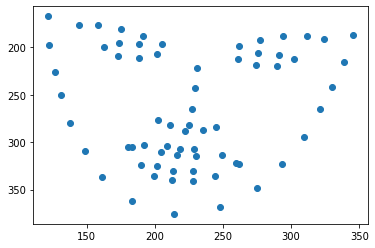

In [14]:
xs = data.iloc[0,:68]
# print(xs[:5])
ys = data.iloc[0,68:136]
# print(ys[:5])
plt.gca().invert_yaxis()
plt.scatter(xs , ys)

68
68


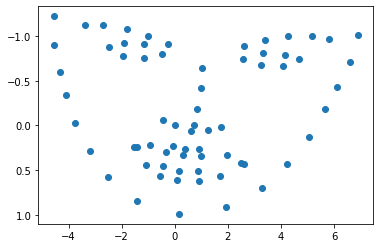

In [15]:
xs = df_copy.iloc[0,:68]
print(len(xs))
ys = df_copy.iloc[0,68:136]
print(len(ys))
plt.gca().invert_yaxis()
plt.scatter(xs , ys)

In [16]:
df_copy

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point129,point130,point131,point132,point133,point134,point135,pitch,yaw,roll
0,-4.564474,-4.538831,-4.310332,-4.104371,-3.760909,-3.196358,-2.528754,-1.432942,0.161521,1.910070,...,0.294290,0.326996,0.346856,0.424014,0.514991,0.512196,0.450723,-0.399231,0.018227,0.085676
1,1.699737,1.867376,2.068086,2.151811,2.083687,1.829813,1.471907,1.268906,1.814036,3.054679,...,0.307290,0.303659,0.292817,0.268232,0.312629,0.330430,0.329678,-0.184650,0.881137,-0.236852
2,-0.978811,-0.794165,-0.546957,-0.341582,-0.139869,0.065739,0.230501,0.478444,0.936699,1.385592,...,0.312387,0.275214,0.240729,0.105203,0.313399,0.366495,0.384562,-0.175379,0.299208,-0.373374
3,-2.388012,-2.198412,-1.970151,-1.754669,-1.469105,-1.011661,-0.505550,0.079681,0.868994,1.598331,...,0.429825,0.407682,0.392696,0.370680,0.397137,0.420232,0.434757,-0.026812,0.011965,-0.220662
4,-2.735013,-2.645186,-2.470803,-2.299747,-2.068172,-1.622860,-1.134495,-0.511527,0.564680,1.717930,...,0.431749,0.433073,0.422078,0.429241,0.436606,0.448688,0.448243,0.057119,0.110732,-0.043283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,-5.082198,-5.060030,-4.929358,-4.733593,-4.322642,-3.560160,-2.553181,-1.568555,-0.469202,0.401077,...,0.307137,0.298616,0.297091,0.249113,0.383394,0.401233,0.388734,-0.367547,-0.429723,0.122791
1321,-3.162506,-2.949796,-2.686615,-2.450949,-2.084517,-1.499884,-0.853428,-0.155901,0.531553,0.920072,...,0.424834,0.356357,0.309149,0.226515,0.608391,0.693954,0.724773,-0.015007,-0.485061,-0.313744
1322,-0.238907,-0.157015,0.018043,0.105198,0.065719,0.059915,-0.001716,0.223342,1.039165,2.075248,...,0.333527,0.306810,0.281539,0.311675,0.591851,0.629385,0.632309,-0.156035,0.567114,-0.108536
1323,-4.130122,-4.081869,-3.863482,-3.620935,-3.289570,-2.790009,-2.149334,-1.283114,-0.082490,1.107847,...,0.295676,0.302028,0.317288,0.334754,0.369706,0.368561,0.344760,-0.197102,-0.070430,0.105118


In [17]:
data2 = df_copy.copy()

In [18]:
X = data2.drop(["pitch","yaw","roll"] , axis = 1)
y = data2.iloc[:,-3:]


In [19]:
# y_train["pitch"]

### *split data into train and test data in next work*

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3, random_state = 42)

In [21]:
y_train.isna().sum().sum() , y_test.isna().sum().sum()  

(0, 0)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score



In [23]:
X_train.shape

(927, 136)

In [24]:
r1 = XGBRegressor(n_estimators=500 , learning_rate=0.1 , max_depth = 6 , nthread = -1 ,seed = 0)
r2 = RandomForestRegressor(n_estimators=10, random_state=0 , max_depth=6 ,n_jobs=1)
model1 = VotingRegressor(estimators=[('xg', r1), ('rf', r2)],n_jobs=-1).fit(X_train , y_train['roll'])
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.8, nthread=6, seed=100).fit(X_train, y_train["yaw"])
model3 = XGBRegressor(n_estimators=1000, learning_rate=0.31, max_depth=4, min_child_weight=1, subsample=1, colsample_bytree=1, nthread=6).fit(X_train, y_train["pitch"])


In [25]:
# y_train.head()

In [26]:
# model1 = model.fit(X_train , y_train['yaw'])
# model2 = model.fit(X_train , y_train['pitch'])
# model3 = model.fit(X_train , y_train['roll'])

In [27]:
y_pred_train = model1.predict(X_train)
y_pred_test =  model1.predict(X_test)

In [28]:
r2_score(y_train['roll'] , y_pred_train) , r2_score(y_test['roll'] , y_pred_test)

(0.9969219781188414, 0.9785160506728172)

In [29]:
y_pred_train = model2.predict(X_train)
y_pred_test =  model2.predict(X_test)

In [30]:
r2_score(y_train['yaw'] , y_pred_train) , r2_score(y_test['yaw'] , y_pred_test)

(0.9988701033250155, 0.9911575724923196)

In [31]:
y_pred_train = model3.predict(X_train)
y_pred_test =  model3.predict(X_test)

In [32]:
r2_score(y_train['pitch'] , y_pred_train) , r2_score(y_test['pitch'] , y_pred_test)

(0.9999853597069382, 0.9580881051669348)

### *function to use through drawing axis*

In [33]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),5)

    return img

In [34]:
predictor=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()

### *code to capture images using laptop camera*

In [35]:
# capture2 = cv2.VideoCapture(0)
# while not capture2.isOpened():
#     capture2 = cv2.VideoCapture(0)
#     cv2.waitKey(1000)
#     print("Wait for the camera to open")

# ret, frame = capture2.read()
# cv2.imwrite('test43.jpg', frame)
# capture2.release()
# cv2.destroyAllWindows()

###  *Applying the model for some new images*

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


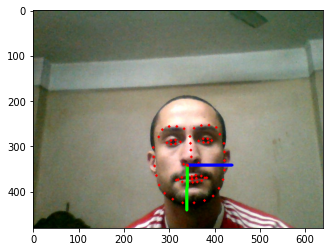

<Figure size 3600x2880 with 0 Axes>

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


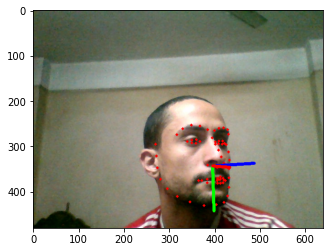

<Figure size 3600x2880 with 0 Axes>

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


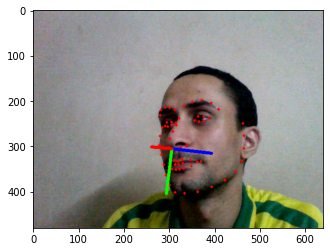

<Figure size 3600x2880 with 0 Axes>

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


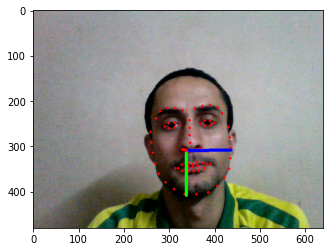

<Figure size 3600x2880 with 0 Axes>

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


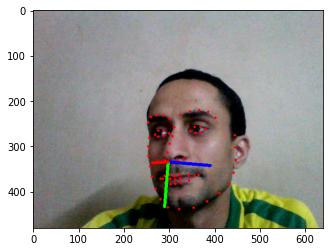

<Figure size 3600x2880 with 0 Axes>

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


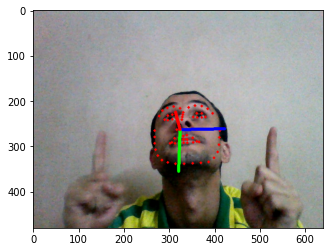

<Figure size 3600x2880 with 0 Axes>

*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


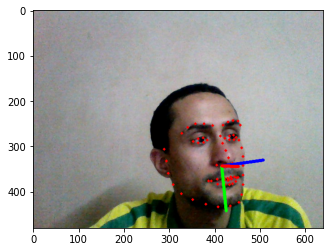

<Figure size 3600x2880 with 0 Axes>

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [36]:
cap1 = cv2.VideoCapture("test1.jpg")
cap2 = cv2.VideoCapture("test2.jpg")
cap3 = cv2.VideoCapture("test3.jpg")
cap4 = cv2.VideoCapture("test13.jpg")
cap5 = cv2.VideoCapture("test23.jpg")
cap6 = cv2.VideoCapture("test33.jpg")
cap7 = cv2.VideoCapture("test43.jpg")
# cap = cv2.VideoCapture(0)
hog_face_detector = dlib.get_frontal_face_detector()

dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# pointx = []
# pointy = []
caps=[cap1 , cap2 , cap3 , cap4 , cap5 , cap6 , cap7]
while True:
    for cap in caps:
        pointx = []
        pointy = []
    
        _, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = hog_face_detector(gray)
        for face in faces:

            face_landmarks = dlib_facelandmark(gray, face)
    #         print(face_landmarks)

            for n in range(0, 68):
                x = face_landmarks.part(n).x
                pointx.append(float(x))
                y = face_landmarks.part(n).y
                pointy.append(float(y))
                cv2.circle(frame, (x, y), 1, (0, 0, 255), 3)
    #             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
                if n == 67:
                    print("*************")
    # #     print()
    # #     print(pointx)
    # #     print(len(pointx))
    # #     print("****")
    # #     print(pointy)
    # #     print("****")
        points = np.array(pointx + pointy)
    #     print(points , len(points) , type(points))
    #     print("*****")
    # #     print(points)
    # #     print("****")
    # #     print(data.iloc[0,:])
    # #     print("****")
        arx = np.abs(points[20] - points[32]) 
    # #     print(arx)
        ary = np.abs(points[88] - points[100])
    # #     print(ary)
        points[:68] = (points[:68] - points[32])/arx
    # #     print(points)
        points[68:136] = (points[68:136] - points[100])/ary
    #     print(points , len(points))
    # #     print("****")
    # #     print(df_copy.iloc[0,32] , points[32])
    # #     print(df_copy.iloc[0,100] , points[100])
#         print(points , len(points))
    #     print("****")
    #     print(df_copy.iloc[0,:])


    #     cv2.imshow("Face Landmarks", frame)
        nose_x, nose_y = pointx[32] , pointy[32]
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        roll = model1.predict(points.reshape(1,-1))[0]
        yaw = model2.predict(points.reshape(1,-1))[0]
        pitch = model3.predict(points.reshape(1,-1))[0]

    #     plt.imshow(draw_axis(frame, -1*0.018227,-0.399231,0.085676, nose_x, nose_y))
        plt.imshow(draw_axis(frame, -1*yaw , pitch, roll, nose_x, nose_y))


        plt.figure(figsize=(50, 40))

        plt.show()


        key = cv2.waitKey(5)
        if key == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture(0)

# hog_face_detector = dlib.get_frontal_face_detector()

# dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# _, frame = cap.read()
# #     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# faces = hog_face_detector(frame)
# for face in faces:
    
    

#     face_landmarks = dlib_facelandmark(frame, face)
# #         print(face_landmarks)

    
#     for n in range(0, 68):
#         x = face_landmarks.part(n).x
#         pointx.append(float(x))
#         y = face_landmarks.part(n).y
#         pointy.append(float(y))
#         cv2.circle(frame, (x, y), 1, (0, 0, 255), 1)
# #             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
#         if n == 67:
#             print("*************")


#     cv2.imshow("Face Landmarks", frame)

# key = cv2.waitKey(50)
# if key == 57:
#     break
# cap.release()
# cv2.destroyAllWindows()

### *Applying work on video live*

*************
[-3.35714286 -3.28571429 -3.21428571 -3.07142857 -2.78571429 -2.21428571
 -1.42857143 -0.42857143  0.78571429  2.07142857  3.14285714  4.
  4.57142857  4.78571429  4.92857143  4.92857143  4.92857143 -2.85714286
 -2.5        -1.78571429 -1.         -0.21428571  1.07142857  1.92857143
  2.71428571  3.57142857  4.07142857  0.42857143  0.35714286  0.35714286
  0.28571429 -0.42857143  0.          0.5         1.          1.42857143
 -2.         -1.64285714 -1.07142857 -0.57142857 -1.07142857 -1.64285714
  1.71428571  2.14285714  2.71428571  3.14285714  2.71428571  2.21428571
 -1.         -0.5         0.07142857  0.57142857  1.07142857  1.71428571
  2.35714286  1.78571429  1.14285714  0.64285714  0.14285714 -0.42857143
 -0.71428571  0.14285714  0.57142857  1.07142857  2.07142857  1.14285714
  0.57142857  0.14285714 -0.45       -0.2         0.05        0.3
  0.55        0.78333333  0.96666667  1.11666667  1.15        1.1
  0.95        0.76666667  0.53333333  0.28333333  0.0333333

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.61538462 -3.53846154 -3.46153846 -3.23076923 -2.92307692 -2.38461538
 -1.46153846 -0.38461538  0.92307692  2.23076923  3.38461538  4.30769231
  4.92307692  5.23076923  5.30769231  5.38461538  5.38461538 -3.07692308
 -2.69230769 -1.92307692 -1.         -0.15384615  1.15384615  2.07692308
  3.          3.84615385  4.38461538  0.53846154  0.46153846  0.38461538
  0.38461538 -0.46153846  0.          0.53846154  1.07692308  1.53846154
 -2.15384615 -1.76923077 -1.15384615 -0.53846154 -1.15384615 -1.76923077
  1.84615385  2.30769231  2.92307692  3.38461538  3.          2.38461538
 -1.07692308 -0.46153846  0.07692308  0.61538462  1.15384615  1.84615385
  2.53846154  1.92307692  1.23076923  0.69230769  0.15384615 -0.46153846
 -0.69230769  0.15384615  0.61538462  1.23076923  2.23076923  1.23076923
  0.69230769  0.15384615 -0.47540984 -0.2295082   0.01639344  0.26229508
  0.52459016  0.75409836  0.93442623  1.08196721  1.1147541   1.06557377
  0.91803279  0.73770492  0.50819672 

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.5        -3.5        -3.35714286 -3.21428571 -2.85714286 -2.21428571
 -1.35714286 -0.28571429  0.92857143  2.07142857  3.14285714  3.92857143
  4.42857143  4.64285714  4.71428571  4.71428571  4.71428571 -2.92857143
 -2.5        -1.78571429 -1.         -0.21428571  1.07142857  1.92857143
  2.71428571  3.5         3.92857143  0.42857143  0.42857143  0.35714286
  0.35714286 -0.42857143  0.          0.5         1.          1.42857143
 -2.07142857 -1.64285714 -1.07142857 -0.57142857 -1.07142857 -1.57142857
  1.64285714  2.14285714  2.64285714  3.07142857  2.71428571  2.14285714
 -1.14285714 -0.57142857  0.07142857  0.57142857  1.07142857  1.71428571
  2.42857143  1.78571429  1.14285714  0.64285714  0.14285714 -0.5
 -0.78571429  0.14285714  0.57142857  1.14285714  2.07142857  1.14285714
  0.57142857  0.14285714 -0.45901639 -0.21311475  0.03278689  0.29508197
  0.54098361  0.75409836  0.95081967  1.09836066  1.1147541   1.06557377
  0.8852459   0.68852459  0.47540984  0.2295082  -0.016393

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.4        -3.33333333 -3.26666667 -3.06666667 -2.73333333 -2.2
 -1.4        -0.46666667  0.73333333  1.86666667  2.86666667  3.6
  4.13333333  4.26666667  4.4         4.4         4.4        -2.86666667
 -2.46666667 -1.73333333 -1.         -0.2         0.93333333  1.66666667
  2.46666667  3.2         3.66666667  0.4         0.33333333  0.33333333
  0.33333333 -0.4         0.          0.46666667  0.86666667  1.33333333
 -2.         -1.6        -1.06666667 -0.6        -1.06666667 -1.53333333
  1.53333333  1.93333333  2.46666667  2.86666667  2.46666667  2.
 -1.06666667 -0.53333333  0.06666667  0.53333333  0.93333333  1.53333333
  2.13333333  1.6         1.06666667  0.6         0.06666667 -0.46666667
 -0.8         0.06666667  0.53333333  1.          1.86666667  1.
  0.53333333  0.06666667 -0.49180328 -0.24590164  0.          0.24590164
  0.49180328  0.72131148  0.91803279  1.06557377  1.09836066  1.04918033
  0.8852459   0.68852459  0.45901639  0.19672131 -0.04918033 -

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.46666667 -3.46666667 -3.4        -3.2        -2.86666667 -2.26666667
 -1.46666667 -0.46666667  0.73333333  1.86666667  2.8         3.53333333
  4.          4.2         4.26666667  4.26666667  4.26666667 -2.86666667
 -2.46666667 -1.8        -1.         -0.26666667  0.93333333  1.66666667
  2.46666667  3.2         3.6         0.33333333  0.33333333  0.33333333
  0.33333333 -0.4         0.          0.4         0.86666667  1.33333333
 -2.06666667 -1.66666667 -1.13333333 -0.66666667 -1.13333333 -1.66666667
  1.46666667  1.86666667  2.4         2.8         2.4         1.93333333
 -1.06666667 -0.46666667  0.06666667  0.53333333  0.93333333  1.53333333
  2.13333333  1.66666667  1.06666667  0.66666667  0.13333333 -0.4
 -0.8         0.13333333  0.6         1.          1.86666667  1.
  0.6         0.13333333 -0.48387097 -0.24193548  0.          0.25806452
  0.5         0.72580645  0.90322581  1.0483871   1.08064516  1.03225806
  0.87096774  0.66129032  0.43548387  0.17741935 -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.25       -3.1875     -3.125      -2.9375     -2.625      -2.0625
 -1.3125     -0.375       0.75        1.8125      2.6875      3.375
  3.8125      4.          4.          4.0625      4.0625     -2.75
 -2.375      -1.6875     -1.         -0.25        0.875       1.625
  2.375       3.0625      3.4375      0.375       0.3125      0.3125
  0.3125     -0.375       0.          0.4375      0.8125      1.25
 -1.875      -1.5        -1.0625     -0.5625     -1.         -1.5
  1.375       1.8125      2.3125      2.6875      2.3125      1.8125
 -0.875      -0.375       0.125       0.5         0.875       1.4375
  2.          1.5         1.          0.5625      0.1875     -0.375
 -0.625       0.125       0.5625      0.9375      1.75        0.9375
  0.5625      0.125      -0.47540984 -0.2295082   0.01639344  0.27868852
  0.52459016  0.73770492  0.93442623  1.06557377  1.09836066  1.04918033
  0.8852459   0.68852459  0.45901639  0.19672131 -0.06557377 -0.29508197
 -0.55737705 -0.78

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.4        -3.33333333 -3.26666667 -3.06666667 -2.8        -2.2
 -1.4        -0.4         0.8         1.93333333  2.93333333  3.66666667
  4.13333333  4.33333333  4.4         4.46666667  4.4        -2.86666667
 -2.46666667 -1.8        -1.         -0.26666667  0.93333333  1.73333333
  2.53333333  3.26666667  3.73333333  0.4         0.33333333  0.33333333
  0.33333333 -0.4         0.          0.46666667  0.86666667  1.33333333
 -2.         -1.6        -1.06666667 -0.6        -1.06666667 -1.6
  1.53333333  1.93333333  2.46666667  2.86666667  2.46666667  2.
 -1.         -0.46666667  0.06666667  0.53333333  1.          1.6
  2.2         1.66666667  1.06666667  0.66666667  0.13333333 -0.4
 -0.73333333  0.13333333  0.6         1.          1.93333333  1.06666667
  0.6         0.13333333 -0.5        -0.25806452  0.          0.25806452
  0.5         0.72580645  0.90322581  1.0483871   1.08064516  1.03225806
  0.87096774  0.67741935  0.4516129   0.20967742 -0.0483871  -0.29032258


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.08333333 -3.16666667 -3.08333333 -2.91666667 -2.66666667 -2.16666667
 -1.33333333 -0.16666667  1.16666667  2.66666667  4.08333333  5.16666667
  5.91666667  6.25        6.41666667  6.41666667  6.41666667 -2.91666667
 -2.58333333 -1.83333333 -1.         -0.16666667  1.33333333  2.25
  3.33333333  4.33333333  4.91666667  0.5         0.41666667  0.25
  0.08333333 -0.5         0.          0.5         1.08333333  1.66666667
 -2.08333333 -1.66666667 -1.08333333 -0.41666667 -1.         -1.58333333
  2.25        2.66666667  3.33333333  3.83333333  3.33333333  2.75
 -1.         -0.41666667  0.16666667  0.66666667  1.16666667  2.
  3.          2.08333333  1.33333333  0.75        0.25       -0.33333333
 -0.66666667  0.16666667  0.66666667  1.25        2.58333333  1.25
  0.75        0.16666667 -0.50819672 -0.29508197 -0.06557377  0.18032787
  0.42622951  0.67213115  0.86885246  1.03278689  1.08196721  1.03278689
  0.90163934  0.72131148  0.50819672  0.26229508  0.         -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-2.88888889 -3.11111111 -3.11111111 -3.         -2.55555556 -2.
 -1.22222222 -0.11111111  1.55555556  3.44444444  5.44444444  7.22222222
  8.55555556  9.44444444  9.77777778  9.77777778  9.88888889 -3.
 -2.77777778 -2.         -1.          0.          1.77777778  3.22222222
  4.66666667  6.11111111  7.          0.77777778  0.55555556  0.22222222
 -0.11111111 -0.55555556  0.          0.66666667  1.44444444  2.22222222
 -2.         -1.55555556 -0.77777778  0.         -0.66666667 -1.44444444
  3.11111111  4.          4.77777778  5.44444444  4.77777778  4.
 -1.11111111 -0.55555556  0.11111111  0.77777778  1.55555556  2.66666667
  4.          2.77777778  1.77777778  0.88888889  0.22222222 -0.55555556
 -0.77777778  0.22222222  0.88888889  1.66666667  3.44444444  1.66666667
  0.88888889  0.22222222 -0.53333333 -0.31666667 -0.1         0.13333333
  0.38333333  0.63333333  0.86666667  1.05        1.08333333  1.05
  0.91666667  0.76666667  0.56666667  0.31666667  0.05       -

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



[-3.         -3.33333333 -3.5        -3.16666667 -2.66666667 -2.
 -1.16666667  0.5         2.66666667  5.5         8.66666667 11.5
 13.83333333 15.33333333 16.         16.16666667 16.33333333 -3.33333333
 -3.16666667 -2.16666667 -1.          0.33333333  3.          4.83333333
  7.          9.         10.66666667  1.33333333  0.83333333  0.33333333
 -0.33333333 -0.66666667  0.          1.          2.16666667  3.33333333
 -2.16666667 -1.83333333 -0.83333333  0.33333333 -0.66666667 -1.66666667
  5.          6.          7.16666667  8.16666667  7.16666667  6.
 -1.16666667 -0.66666667  0.16666667  1.16666667  2.16666667  4.
  6.          4.16666667  2.5         1.5         0.5        -0.5
 -0.66666667  0.33333333  1.33333333  2.33333333  5.16666667  2.33333333
  1.33333333  0.33333333 -0.52542373 -0.3220339  -0.10169492  0.13559322
  0.37288136  0.62711864  0.88135593  1.05084746  1.08474576  1.06779661
  0.93220339  0.77966102  0.59322034  0.3559322   0.05084746 -0.25423729
 -0.55932203 -0

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-5.00000000e+00 -7.00000000e+00 -8.00000000e+00 -7.00000000e+00
 -5.00000000e+00 -3.50000000e+00 -1.50000000e+00  2.00000000e+00
  7.50000000e+00  1.60000000e+01  2.60000000e+01  3.60000000e+01
  4.50000000e+01  5.10000000e+01  5.40000000e+01  5.40000000e+01
  5.40000000e+01 -5.00000000e+00 -4.50000000e+00 -2.00000000e+00
  1.00000000e+00  3.50000000e+00  8.50000000e+00  1.45000000e+01
  2.10000000e+01  2.75000000e+01  3.25000000e+01  5.50000000e+00
  3.50000000e+00  1.00000000e+00 -1.50000000e+00 -2.00000000e+00
  0.00000000e+00  2.50000000e+00  6.00000000e+00  9.50000000e+00
 -2.50000000e+00 -1.50000000e+00  1.50000000e+00  4.50000000e+00
  2.00000000e+00 -1.00000000e+00  1.60000000e+01  1.85000000e+01
  2.25000000e+01  2.60000000e+01  2.30000000e+01  1.90000000e+01
 -1.50000000e+00 -1.50000000e+00  5.00000000e-01  3.00000000e+00
  5.50000000e+00  1.10000000e+01  1.75000000e+01  1.15000000e+01
  7.00000000e+00  3.50000000e+00  1.50000000e+00 -5.00000000e-01
 -5.00

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-5.00000000e+00 -7.00000000e+00 -8.00000000e+00 -7.00000000e+00
 -5.00000000e+00 -3.50000000e+00 -1.50000000e+00  2.00000000e+00
  7.50000000e+00  1.60000000e+01  2.60000000e+01  3.60000000e+01
  4.50000000e+01  5.10000000e+01  5.40000000e+01  5.40000000e+01
  5.40000000e+01 -5.00000000e+00 -4.50000000e+00 -2.00000000e+00
  1.00000000e+00  3.50000000e+00  8.50000000e+00  1.45000000e+01
  2.10000000e+01  2.75000000e+01  3.25000000e+01  5.50000000e+00
  3.50000000e+00  1.00000000e+00 -1.50000000e+00 -2.00000000e+00
  0.00000000e+00  2.50000000e+00  6.00000000e+00  9.50000000e+00
 -2.50000000e+00 -1.50000000e+00  1.50000000e+00  4.50000000e+00
  2.00000000e+00 -1.00000000e+00  1.60000000e+01  1.85000000e+01
  2.25000000e+01  2.60000000e+01  2.30000000e+01  1.90000000e+01
 -1.50000000e+00 -1.50000000e+00  5.00000000e-01  3.00000000e+00
  5.50000000e+00  1.10000000e+01  1.75000000e+01  1.15000000e+01
  7.00000000e+00  3.50000000e+00  1.50000000e+00 -5.00000000e-01
 -5.00000000e-01  1.00000

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-4.00000000e-01 -1.20000000e+00 -1.80000000e+00 -1.60000000e+00
 -1.20000000e+00 -6.00000000e-01 -2.00000000e-01  6.00000000e-01
  3.00000000e+00  6.60000000e+00  1.06000000e+01  1.46000000e+01
  1.82000000e+01  2.08000000e+01  2.20000000e+01  2.22000000e+01
  2.24000000e+01 -1.20000000e+00 -1.00000000e+00 -2.00000000e-01
  1.00000000e+00  2.00000000e+00  3.20000000e+00  5.60000000e+00
  8.40000000e+00  1.12000000e+01  1.32000000e+01  2.60000000e+00
  1.60000000e+00  4.00000000e-01 -8.00000000e-01 -6.00000000e-01
  0.00000000e+00  1.00000000e+00  2.20000000e+00  3.80000000e+00
  0.00000000e+00  4.00000000e-01  1.40000000e+00  2.40000000e+00
  1.40000000e+00  4.00000000e-01  6.60000000e+00  7.60000000e+00
  9.00000000e+00  1.06000000e+01  9.20000000e+00  7.60000000e+00
  0.00000000e+00 -4.00000000e-01  2.00000000e-01  1.00000000e+00
  2.00000000e+00  4.20000000e+00  6.80000000e+00  4.40000000e+00
  2.40000000e+00  1.40000000e+00  6.00000000e-01  0.00000000e+00
  2.0000000

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-0.75       -1.75       -2.5        -2.         -1.25       -0.75
  0.          1.25        4.          8.25       13.25       18.25
 22.75       26.         27.5        27.75       28.         -1.25
 -1.25       -0.25        1.          2.          4.25        7.25
 10.5        13.75       16.25        3.          1.75        0.5
 -1.         -0.75        0.          1.25        3.          4.75
 -0.25        0.          1.5         2.75        1.5         0.25
  8.25        9.5        11.5        13.25       11.5         9.5
  0.         -0.5         0.25        1.25        2.75        5.5
  8.5         5.5         3.25        1.75        0.5         0.
  0.25        0.5         1.5         3.          7.5         3.25
  1.5         0.5        -0.56896552 -0.37931034 -0.17241379  0.05172414
  0.31034483  0.5862069   0.84482759  1.05172414  1.10344828  1.0862069
  0.98275862  0.84482759  0.65517241  0.39655172  0.06896552 -0.27586207
 -0.60344828 -0.89655172 -0.982

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-2.33333333e+00 -3.66666667e+00 -4.33333333e+00 -3.66666667e+00
 -2.33333333e+00 -1.33333333e+00 -3.33333333e-01  1.66666667e+00
  5.33333333e+00  1.10000000e+01  1.76666667e+01  2.46666667e+01
  3.06666667e+01  3.46666667e+01  3.66666667e+01  3.66666667e+01
  3.66666667e+01 -2.66666667e+00 -2.33333333e+00 -6.66666667e-01
  1.00000000e+00  2.66666667e+00  5.66666667e+00  9.66666667e+00
  1.40000000e+01  1.83333333e+01  2.20000000e+01  4.00000000e+00
  2.33333333e+00  6.66666667e-01 -1.00000000e+00 -1.33333333e+00
  0.00000000e+00  1.66666667e+00  4.00000000e+00  6.66666667e+00
 -1.33333333e+00 -6.66666667e-01  1.33333333e+00  3.00000000e+00
  1.66666667e+00 -3.33333333e-01  1.10000000e+01  1.26666667e+01
  1.50000000e+01  1.76666667e+01  1.53333333e+01  1.30000000e+01
 -3.33333333e-01 -3.33333333e-01  6.66666667e-01  2.00000000e+00
  4.00000000e+00  7.33333333e+00  1.20000000e+01  7.66666667e+00
  4.66666667e+00  2.33333333e+00  1.00000000e+00  0.00000000e+00
  3.33333333e-01  1.00000

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.6        -4.         -4.2        -4.         -3.6        -2.8
 -1.6         0.2         3.          6.6        10.6        14.
 16.8        18.6        19.2        19.4        19.4        -3.8
 -3.6        -2.4        -1.          0.6         3.8         6.2
  8.8        11.2        12.8         1.8         1.2         0.4
 -0.4        -0.8         0.          1.          2.4         4.
 -2.4        -1.8        -0.8         0.4        -0.6        -1.6
  6.4         7.6         9.         10.2         9.          7.6
 -1.6        -1.          0.2         1.4         2.6         4.8
  7.4         5.          3.          1.6         0.4        -0.8
 -1.          0.4         1.6         2.8         6.4         2.8
  1.6         0.4        -0.47457627 -0.28813559 -0.08474576  0.15254237
  0.38983051  0.6440678   0.88135593  1.06779661  1.11864407  1.08474576
  0.96610169  0.79661017  0.61016949  0.3559322   0.08474576 -0.22033898
 -0.50847458 -0.83050847 -0.94915254 -1.   

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.30769231 -3.30769231 -3.15384615 -3.         -2.69230769 -2.07692308
 -1.30769231 -0.23076923  1.07692308  2.38461538  3.61538462  4.61538462
  5.23076923  5.61538462  5.69230769  5.76923077  5.69230769 -2.84615385
 -2.53846154 -1.76923077 -1.         -0.23076923  1.23076923  2.15384615
  3.07692308  3.92307692  4.53846154  0.46153846  0.38461538  0.30769231
  0.23076923 -0.38461538  0.          0.46153846  1.          1.53846154
 -2.07692308 -1.61538462 -1.07692308 -0.53846154 -1.         -1.61538462
  2.          2.53846154  3.07692308  3.53846154  3.15384615  2.53846154
 -1.         -0.46153846  0.07692308  0.61538462  1.07692308  1.84615385
  2.76923077  2.          1.23076923  0.69230769  0.15384615 -0.38461538
 -0.69230769  0.15384615  0.61538462  1.15384615  2.38461538  1.15384615
  0.61538462  0.15384615 -0.5        -0.25       -0.01666667  0.23333333
  0.48333333  0.71666667  0.91666667  1.08333333  1.11666667  1.06666667
  0.91666667  0.73333333  0.5   

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.29411765 -3.23529412 -3.17647059 -2.94117647 -2.64705882 -2.05882353
 -1.23529412 -0.29411765  0.70588235  1.70588235  2.47058824  3.11764706
  3.47058824  3.64705882  3.64705882  3.64705882  3.58823529 -2.64705882
 -2.35294118 -1.70588235 -1.         -0.35294118  0.70588235  1.35294118
  2.05882353  2.70588235  3.          0.23529412  0.23529412  0.23529412
  0.29411765 -0.35294118  0.          0.35294118  0.70588235  1.05882353
 -1.94117647 -1.58823529 -1.11764706 -0.76470588 -1.11764706 -1.58823529
  1.23529412  1.64705882  2.05882353  2.35294118  2.05882353  1.64705882
 -0.94117647 -0.41176471  0.05882353  0.41176471  0.82352941  1.35294118
  1.88235294  1.41176471  0.94117647  0.52941176  0.11764706 -0.41176471
 -0.70588235  0.05882353  0.47058824  0.82352941  1.64705882  0.88235294
  0.47058824  0.11764706 -0.41666667 -0.16666667  0.08333333  0.33333333
  0.58333333  0.8         0.96666667  1.1         1.11666667  1.06666667
  0.9         0.68333333  0.46666667  0.2        -0

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.68       -3.6        -3.52       -3.24       -2.72       -2.
 -1.16       -0.36        0.36        0.8         1.          1.08
  1.04        1.08        1.12        1.          0.8        -2.36
 -2.         -1.52       -1.         -0.52        0.04        0.32
  0.6         0.84        0.96       -0.08        0.12        0.28
  0.48       -0.28        0.          0.28        0.48        0.64
 -1.72       -1.44       -1.16       -0.92       -1.12       -1.44
  0.16        0.4         0.6         0.72        0.6         0.36
 -0.76       -0.28        0.12        0.36        0.52        0.72
  0.8         0.76        0.6         0.4         0.16       -0.28
 -0.56        0.12        0.36        0.52        0.72        0.56
  0.36        0.16       -0.33870968 -0.0483871   0.24193548  0.51612903
  0.74193548  0.90322581  1.01612903  1.08064516  1.08064516  1.01612903
  0.82258065  0.56451613  0.32258065  0.11290323 -0.09677419 -0.29032258
 -0.46774194 -0.77419355 -0.91935484 -1.016129

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.8        -3.72       -3.64       -3.36       -2.84       -2.08
 -1.24       -0.4         0.32        0.72        0.88        0.96
  0.92        0.96        0.96        0.88        0.68       -2.4
 -2.         -1.52       -1.         -0.48        0.04        0.28
  0.52        0.72        0.8        -0.08        0.08        0.28
  0.48       -0.32        0.          0.24        0.44        0.6
 -1.72       -1.44       -1.16       -0.96       -1.16       -1.44
  0.08        0.28        0.48        0.56        0.44        0.24
 -0.72       -0.32        0.08        0.32        0.48        0.64
  0.68        0.68        0.52        0.36        0.12       -0.28
 -0.56        0.08        0.32        0.44        0.6         0.48
  0.36        0.12       -0.41935484 -0.11290323  0.19354839  0.5
  0.72580645  0.90322581  1.01612903  1.08064516  1.06451613  0.98387097
  0.79032258  0.5483871   0.30645161  0.08064516 -0.12903226 -0.33870968
 -0.51612903 -0.79032258 -0.91935484 -1

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.84       -3.76       -3.68       -3.4        -2.84       -2.04
 -1.2        -0.4         0.32        0.72        0.88        1.
  1.          1.          1.          0.92        0.72       -2.36
 -1.96       -1.48       -1.         -0.48        0.04        0.24
  0.48        0.68        0.76       -0.08        0.08        0.28
  0.52       -0.28        0.          0.28        0.48        0.64
 -1.72       -1.44       -1.16       -0.96       -1.16       -1.44
  0.04        0.28        0.48        0.56        0.44        0.24
 -0.68       -0.24        0.16        0.36        0.52        0.68
  0.72        0.72        0.56        0.4         0.16       -0.2
 -0.52        0.16        0.36        0.52        0.64        0.52
  0.4         0.16       -0.42622951 -0.1147541   0.19672131  0.50819672
  0.73770492  0.91803279  1.03278689  1.09836066  1.08196721  1.01639344
  0.80327869  0.52459016  0.27868852  0.06557377 -0.16393443 -0.37704918
 -0.54098361 -0.80327869 -0.93442623 -1.0163934

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.88       -3.8        -3.68       -3.44       -2.92       -2.16
 -1.28       -0.48        0.2         0.68        0.84        0.92
  0.96        0.96        1.          0.92        0.72       -2.36
 -2.         -1.52       -1.         -0.48        0.          0.24
  0.48        0.68        0.8        -0.12        0.08        0.28
  0.48       -0.28        0.          0.24        0.44        0.6
 -1.76       -1.48       -1.2        -0.96       -1.16       -1.44
  0.04        0.24        0.48        0.56        0.44        0.2
 -0.76       -0.28        0.12        0.32        0.44        0.64
  0.72        0.68        0.52        0.36        0.12       -0.28
 -0.56        0.12        0.32        0.44        0.6         0.48
  0.36        0.12       -0.44444444 -0.14285714  0.15873016  0.46031746
  0.6984127   0.87301587  0.98412698  1.04761905  1.04761905  0.96825397
  0.79365079  0.53968254  0.3015873   0.07936508 -0.14285714 -0.33333333
 -0.52380952 -0.79365079 -0

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.79166667 -3.70833333 -3.625      -3.375      -2.83333333 -2.08333333
 -1.25       -0.41666667  0.33333333  0.83333333  1.04166667  1.125
  1.08333333  1.125       1.16666667  1.08333333  0.875      -2.375
 -2.         -1.54166667 -1.         -0.5         0.          0.33333333
  0.625       0.875       1.         -0.08333333  0.08333333  0.29166667
  0.45833333 -0.33333333  0.          0.29166667  0.45833333  0.625
 -1.75       -1.45833333 -1.20833333 -0.95833333 -1.16666667 -1.45833333
  0.125       0.375       0.58333333  0.70833333  0.58333333  0.375
 -0.79166667 -0.29166667  0.125       0.33333333  0.54166667  0.70833333
  0.79166667  0.75        0.58333333  0.375       0.125      -0.29166667
 -0.58333333  0.125       0.33333333  0.54166667  0.70833333  0.54166667
  0.375       0.125      -0.37704918 -0.08196721  0.21311475  0.50819672
  0.75409836  0.91803279  1.03278689  1.1147541   1.1147541   1.03278689
  0.83606557  0.57377049  0.32786885  0.09836066 -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


136
*************
[-3.79166667 -3.70833333 -3.625      -3.375      -2.83333333 -2.04166667
 -1.16666667 -0.33333333  0.45833333  0.95833333  1.16666667  1.25
  1.29166667  1.33333333  1.33333333  1.25        1.08333333 -2.45833333
 -2.08333333 -1.54166667 -1.         -0.45833333  0.125       0.45833333
  0.79166667  1.04166667  1.125      -0.04166667  0.125       0.29166667
  0.5        -0.29166667  0.          0.29166667  0.5         0.70833333
 -1.75       -1.5        -1.20833333 -0.95833333 -1.20833333 -1.45833333
  0.25        0.5         0.70833333  0.83333333  0.66666667  0.45833333
 -0.79166667 -0.29166667  0.16666667  0.41666667  0.58333333  0.79166667
  0.91666667  0.875       0.66666667  0.45833333  0.16666667 -0.25
 -0.58333333  0.16666667  0.41666667  0.58333333  0.83333333  0.625
  0.41666667  0.16666667 -0.35       -0.05        0.25        0.55
  0.78333333  0.95        1.06666667  1.13333333  1.13333333  1.06666667
  0.86666667  0.61666667  0.36666667  0.15       -0.0833

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.42105263 -3.31578947 -3.26315789 -3.05263158 -2.68421053 -2.10526316
 -1.31578947 -0.42105263  0.52631579  1.42105263  2.          2.42105263
  2.63157895  2.73684211  2.78947368  2.78947368  2.68421053 -2.63157895
 -2.26315789 -1.63157895 -1.         -0.31578947  0.52631579  1.05263158
  1.63157895  2.15789474  2.42105263  0.15789474  0.21052632  0.31578947
  0.36842105 -0.36842105  0.          0.36842105  0.68421053  1.
 -1.89473684 -1.52631579 -1.15789474 -0.78947368 -1.15789474 -1.52631579
  0.89473684  1.21052632  1.57894737  1.84210526  1.57894737  1.21052632
 -0.89473684 -0.42105263  0.05263158  0.42105263  0.73684211  1.15789474
  1.52631579  1.21052632  0.84210526  0.47368421  0.10526316 -0.36842105
 -0.68421053  0.10526316  0.42105263  0.78947368  1.31578947  0.78947368
  0.47368421  0.10526316 -0.43548387 -0.17741935  0.08064516  0.33870968
  0.58064516  0.79032258  0.9516129   1.06451613  1.08064516  1.03225806
  0.85483871  0.64516129  0.40322581  0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.47058824 -3.41176471 -3.29411765 -3.11764706 -2.82352941 -2.17647059
 -1.35294118 -0.41176471  0.64705882  1.58823529  2.35294118  2.88235294
  3.23529412  3.35294118  3.41176471  3.47058824  3.41176471 -2.82352941
 -2.35294118 -1.70588235 -1.         -0.29411765  0.76470588  1.41176471
  2.05882353  2.64705882  3.          0.29411765  0.35294118  0.35294118
  0.41176471 -0.35294118  0.          0.41176471  0.76470588  1.11764706
 -1.94117647 -1.58823529 -1.11764706 -0.70588235 -1.11764706 -1.58823529
  1.17647059  1.52941176  2.          2.35294118  2.          1.58823529
 -1.05882353 -0.52941176  0.          0.47058824  0.82352941  1.35294118
  1.82352941  1.41176471  0.94117647  0.52941176  0.05882353 -0.47058824
 -0.82352941  0.05882353  0.47058824  0.88235294  1.58823529  0.88235294
  0.47058824  0.05882353 -0.4516129  -0.20967742  0.0483871   0.30645161
  0.5483871   0.75806452  0.93548387  1.06451613  1.08064516  1.03225806
  0.87096774  0.66129032  0.4354

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.47058824 -3.41176471 -3.29411765 -3.11764706 -2.82352941 -2.17647059
 -1.35294118 -0.41176471  0.64705882  1.58823529  2.35294118  2.88235294
  3.23529412  3.35294118  3.41176471  3.47058824  3.41176471 -2.82352941
 -2.35294118 -1.70588235 -1.         -0.29411765  0.76470588  1.41176471
  2.05882353  2.64705882  3.          0.29411765  0.35294118  0.35294118
  0.41176471 -0.35294118  0.          0.41176471  0.76470588  1.11764706
 -1.94117647 -1.58823529 -1.11764706 -0.70588235 -1.11764706 -1.58823529
  1.17647059  1.52941176  2.          2.35294118  2.          1.58823529
 -1.05882353 -0.52941176  0.          0.47058824  0.82352941  1.35294118
  1.82352941  1.41176471  0.94117647  0.52941176  0.05882353 -0.47058824
 -0.82352941  0.05882353  0.47058824  0.88235294  1.58823529  0.88235294
  0.47058824  0.05882353 -0.4516129  -0.20967742  0.0483871   0.30645161
  0.5483871   0.75806452  0.93548387  1.06451613  1.08064516  1.03225806
  0.87096774  0.66129032  0.43548387  0.19354839 -0

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.6875     -3.6875     -3.625      -3.4375     -3.0625     -2.4375
 -1.5625     -0.5625      0.5625      1.625       2.4375      3.
  3.375       3.5         3.5625      3.5625      3.5        -2.9375
 -2.5        -1.75       -1.         -0.3125      0.8125      1.5
  2.1875      2.8125      3.125       0.25        0.3125      0.3125
  0.375      -0.4375      0.          0.375       0.8125      1.1875
 -2.125      -1.75       -1.25       -0.8125     -1.25       -1.75
  1.1875      1.5625      2.          2.375       2.0625      1.5625
 -1.0625     -0.5         0.          0.4375      0.875       1.375
  1.875       1.4375      0.9375      0.5         0.0625     -0.5
 -0.8125      0.0625      0.5         0.875       1.625       0.9375
  0.5         0.0625     -0.46774194 -0.20967742  0.03225806  0.29032258
  0.53225806  0.75806452  0.91935484  1.06451613  1.09677419  1.03225806
  0.87096774  0.66129032  0.43548387  0.17741935 -0.0483871  -0.29032258
 -0.51612903 -0.79032258 -0.9516129

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.5        -3.4375     -3.375      -3.25       -2.9375     -2.3125
 -1.5        -0.5         0.625       1.6875      2.5625      3.1875
  3.5625      3.6875      3.75        3.75        3.6875     -2.8125
 -2.4375     -1.75       -1.         -0.25        0.8125      1.5625
  2.25        2.9375      3.25        0.3125      0.3125      0.375
  0.375      -0.375       0.          0.4375      0.8125      1.25
 -2.         -1.625      -1.125      -0.6875     -1.125      -1.625
  1.25        1.6875      2.125       2.5         2.1875      1.6875
 -1.         -0.4375      0.125       0.5625      0.9375      1.4375
  2.          1.5         1.          0.5625      0.125      -0.4375
 -0.75        0.125       0.5625      0.9375      1.6875      1.
  0.5625      0.125      -0.40983607 -0.16393443  0.08196721  0.32786885
  0.57377049  0.78688525  0.95081967  1.08196721  1.1147541   1.06557377
  0.91803279  0.72131148  0.47540984  0.2295082  -0.01639344 -0.24590164
 -0.47540984 -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.6        -3.6        -3.53333333 -3.4        -3.06666667 -2.46666667
 -1.6        -0.53333333  0.66666667  1.8         2.73333333  3.4
  3.8         3.93333333  4.          4.06666667  4.06666667 -2.93333333
 -2.53333333 -1.8        -1.         -0.26666667  0.93333333  1.66666667
  2.4         3.06666667  3.46666667  0.33333333  0.33333333  0.33333333
  0.33333333 -0.4         0.          0.4         0.86666667  1.26666667
 -2.13333333 -1.73333333 -1.2        -0.66666667 -1.2        -1.73333333
  1.33333333  1.73333333  2.26666667  2.66666667  2.33333333  1.8
 -1.         -0.53333333  0.06666667  0.46666667  0.86666667  1.46666667
  2.          1.46666667  0.93333333  0.53333333  0.06666667 -0.46666667
 -0.73333333  0.06666667  0.46666667  0.86666667  1.73333333  0.93333333
  0.53333333  0.06666667 -0.3559322  -0.10169492  0.15254237  0.40677966
  0.66101695  0.86440678  1.03389831  1.15254237  1.16949153  1.13559322
  1.          0.81355932  0.61016949  0.3559322   0.11864407 -0.1

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.71428571 -3.64285714 -3.64285714 -3.5        -3.14285714 -2.5
 -1.57142857 -0.57142857  0.71428571  1.92857143  2.85714286  3.64285714
  4.14285714  4.35714286  4.35714286  4.35714286  4.35714286 -3.
 -2.64285714 -1.85714286 -1.         -0.21428571  0.92857143  1.71428571
  2.5         3.28571429  3.71428571  0.35714286  0.35714286  0.35714286
  0.35714286 -0.42857143  0.          0.42857143  0.92857143  1.35714286
 -2.21428571 -1.78571429 -1.21428571 -0.64285714 -1.21428571 -1.78571429
  1.42857143  1.92857143  2.5         2.92857143  2.5         1.92857143
 -1.07142857 -0.57142857  0.07142857  0.5         0.92857143  1.57142857
  2.14285714  1.57142857  1.          0.57142857  0.07142857 -0.5
 -0.78571429  0.07142857  0.5         0.92857143  1.85714286  1.
  0.5         0.07142857 -0.1509434   0.09433962  0.35849057  0.62264151
  0.88679245  1.0754717   1.20754717  1.30188679  1.32075472  1.28301887
  1.16981132  1.01886792  0.83018868  0.58490566  0.32075472  

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.4        -3.33333333 -3.33333333 -3.2        -2.93333333 -2.4
 -1.53333333 -0.6         0.53333333  1.73333333  2.66666667  3.4
  3.8         4.06666667  4.06666667  4.06666667  4.06666667 -2.73333333
 -2.4        -1.73333333 -1.         -0.26666667  0.93333333  1.6
  2.33333333  3.          3.4         0.33333333  0.26666667  0.26666667
  0.26666667 -0.33333333  0.          0.33333333  0.73333333  1.13333333
 -2.         -1.66666667 -1.13333333 -0.66666667 -1.13333333 -1.66666667
  1.33333333  1.8         2.26666667  2.66666667  2.26666667  1.8
 -1.06666667 -0.53333333  0.          0.46666667  0.86666667  1.4
  2.          1.46666667  0.86666667  0.46666667  0.         -0.53333333
 -0.8         0.06666667  0.46666667  0.86666667  1.73333333  0.86666667
  0.46666667  0.06666667 -0.1         0.18        0.44        0.72
  0.96        1.16        1.28        1.36        1.38        1.36
  1.28        1.14        0.94        0.7         0.44        0.16
 -0.08       -0.7        -0.9  

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.0625     -3.0625     -3.         -2.9375     -2.625      -2.125
 -1.375      -0.4375      0.5625      1.5625      2.5         3.1875
  3.625       3.8125      3.8125      3.8125      3.8125     -2.4375
 -2.1875     -1.625      -1.         -0.3125      0.9375      1.5625
  2.25        2.8125      3.1875      0.3125      0.3125      0.25
  0.25       -0.3125      0.          0.375       0.75        1.0625
 -1.8125     -1.5        -1.         -0.5625     -1.         -1.5
  1.25        1.6875      2.1875      2.5         2.1875      1.6875
 -0.9375     -0.4375      0.0625      0.4375      0.75        1.375
  2.          1.375       0.8125      0.4375      0.0625     -0.4375
 -0.6875      0.0625      0.4375      0.8125      1.75        0.8125
  0.4375      0.0625     -0.01886792  0.22641509  0.45283019  0.69811321
  0.90566038  1.0754717   1.16981132  1.20754717  1.20754717  1.18867925
  1.16981132  1.0754717   0.90566038  0.69811321  0.45283019  0.20754717
 -0.037735

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.26666667 -3.2        -3.2        -3.06666667 -2.8        -2.33333333
 -1.6        -0.66666667  0.4         1.46666667  2.46666667  3.33333333
  3.8         4.          4.06666667  4.06666667  4.06666667 -2.6
 -2.26666667 -1.73333333 -1.         -0.33333333  1.          1.66666667
  2.33333333  3.          3.33333333  0.33333333  0.33333333  0.26666667
  0.26666667 -0.33333333  0.          0.4         0.73333333  1.13333333
 -1.93333333 -1.6        -1.06666667 -0.53333333 -1.06666667 -1.53333333
  1.33333333  1.8         2.26666667  2.66666667  2.33333333  1.8
 -1.06666667 -0.6         0.          0.4         0.8         1.4
  2.06666667  1.4         0.8         0.4         0.         -0.53333333
 -0.8         0.          0.4         0.8         1.8         0.8
  0.4         0.          0.06        0.28        0.52        0.76
  0.96        1.14        1.22        1.26        1.26        1.26
  1.24        1.16        1.          0.78        0.52        0.26
  0.         -0.66      

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.2        -3.2        -3.13333333 -3.06666667 -2.8        -2.26666667
 -1.53333333 -0.6         0.53333333  1.53333333  2.46666667  3.33333333
  3.8         4.          4.13333333  4.13333333  4.13333333 -2.53333333
 -2.26666667 -1.66666667 -1.         -0.33333333  1.          1.66666667
  2.4         3.          3.4         0.33333333  0.33333333  0.26666667
  0.26666667 -0.33333333  0.          0.33333333  0.73333333  1.06666667
 -1.86666667 -1.53333333 -1.         -0.6        -1.         -1.53333333
  1.33333333  1.8         2.33333333  2.6         2.33333333  1.8
 -1.         -0.53333333  0.          0.4         0.73333333  1.33333333
  1.93333333  1.33333333  0.8         0.4         0.         -0.46666667
 -0.8         0.          0.4         0.73333333  1.66666667  0.8
  0.4         0.         -0.0625      0.1875      0.45833333  0.70833333
  0.95833333  1.14583333  1.27083333  1.33333333  1.33333333  1.29166667
  1.25        1.14583333  0.95833333  0.729166

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.61538462 -3.61538462 -3.53846154 -3.46153846 -3.15384615 -2.53846154
 -1.61538462 -0.53846154  0.69230769  1.92307692  3.          3.92307692
  4.53846154  4.76923077  4.92307692  5.          5.         -2.92307692
 -2.53846154 -1.84615385 -1.         -0.23076923  1.23076923  2.
  2.84615385  3.53846154  3.92307692  0.46153846  0.46153846  0.38461538
  0.30769231 -0.38461538  0.          0.46153846  0.92307692  1.30769231
 -2.07692308 -1.69230769 -1.15384615 -0.61538462 -1.15384615 -1.69230769
  1.69230769  2.15384615  2.69230769  3.15384615  2.69230769  2.15384615
 -1.23076923 -0.69230769  0.          0.46153846  0.92307692  1.61538462
  2.38461538  1.69230769  1.          0.46153846 -0.07692308 -0.69230769
 -0.92307692  0.          0.46153846  0.92307692  2.          0.92307692
  0.46153846  0.          0.08333333  0.33333333  0.5625      0.8125
  1.04166667  1.20833333  1.3125      1.375       1.375       1.35416667
  1.29166667  1.20833333  1.04166667  0.8125

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.33333333 -3.33333333 -3.33333333 -3.2        -2.86666667 -2.26666667
 -1.4        -0.46666667  0.6         1.66666667  2.6         3.4
  3.93333333  4.2         4.26666667  4.2         4.2        -2.66666667
 -2.33333333 -1.73333333 -1.         -0.33333333  1.          1.66666667
  2.4         3.          3.33333333  0.33333333  0.33333333  0.26666667
  0.26666667 -0.33333333  0.          0.33333333  0.73333333  1.06666667
 -1.93333333 -1.53333333 -1.13333333 -0.6        -1.06666667 -1.53333333
  1.4         1.86666667  2.26666667  2.66666667  2.26666667  1.86666667
 -1.         -0.53333333  0.          0.4         0.8         1.4
  2.          1.4         0.86666667  0.4         0.         -0.46666667
 -0.73333333  0.          0.4         0.8         1.73333333  0.8
  0.4         0.         -0.1509434   0.0754717   0.33962264  0.58490566
  0.83018868  1.03773585  1.16981132  1.28301887  1.30188679  1.26415094
  1.1509434   1.01886792  0.81132075  0.58490566  0.320754

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.23529412 -3.23529412 -3.11764706 -3.         -2.70588235 -2.11764706
 -1.35294118 -0.47058824  0.58823529  1.58823529  2.35294118  3.
  3.41176471  3.52941176  3.58823529  3.58823529  3.52941176 -2.58823529
 -2.29411765 -1.64705882 -1.         -0.35294118  0.82352941  1.47058824
  2.05882353  2.64705882  2.94117647  0.23529412  0.29411765  0.29411765
  0.29411765 -0.35294118  0.          0.35294118  0.76470588  1.11764706
 -1.88235294 -1.52941176 -1.05882353 -0.64705882 -1.05882353 -1.47058824
  1.17647059  1.58823529  2.          2.29411765  2.          1.58823529
 -0.94117647 -0.47058824  0.05882353  0.41176471  0.82352941  1.29411765
  1.82352941  1.35294118  0.88235294  0.41176471  0.05882353 -0.47058824
 -0.70588235  0.05882353  0.41176471  0.82352941  1.58823529  0.82352941
  0.41176471  0.05882353 -0.34482759 -0.10344828  0.13793103  0.4137931
  0.65517241  0.87931034  1.03448276  1.17241379  1.18965517  1.13793103
  0.98275862  0.79310345  0.56896552  0.310344

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.11111111 -3.11111111 -3.         -2.88888889 -2.55555556 -2.
 -1.27777778 -0.38888889  0.55555556  1.5         2.27777778  2.83333333
  3.22222222  3.33333333  3.33333333  3.33333333  3.33333333 -2.61111111
 -2.27777778 -1.66666667 -1.         -0.38888889  0.72222222  1.33333333
  1.94444444  2.5         2.83333333  0.22222222  0.22222222  0.22222222
  0.27777778 -0.38888889  0.          0.33333333  0.66666667  1.
 -1.88888889 -1.5        -1.05555556 -0.66666667 -1.05555556 -1.44444444
  1.11111111  1.5         1.88888889  2.16666667  1.88888889  1.5
 -0.88888889 -0.38888889  0.05555556  0.44444444  0.83333333  1.27777778
  1.77777778  1.33333333  0.88888889  0.5         0.11111111 -0.38888889
 -0.66666667  0.05555556  0.44444444  0.83333333  1.55555556  0.83333333
  0.44444444  0.05555556 -0.47619048 -0.23809524  0.01587302  0.26984127
  0.50793651  0.71428571  0.87301587  1.01587302  1.03174603  0.98412698
  0.82539683  0.63492063  0.3968254   0.15873016 -0.0952381  -0.31746032
 

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.22222222 -3.16666667 -3.05555556 -2.88888889 -2.55555556 -2.
 -1.27777778 -0.44444444  0.61111111  1.55555556  2.33333333  2.88888889
  3.22222222  3.33333333  3.33333333  3.33333333  3.27777778 -2.61111111
 -2.22222222 -1.61111111 -1.         -0.33333333  0.72222222  1.33333333
  1.88888889  2.5         2.83333333  0.22222222  0.22222222  0.27777778
  0.27777778 -0.38888889  0.          0.33333333  0.66666667  1.
 -1.88888889 -1.55555556 -1.11111111 -0.72222222 -1.11111111 -1.5
  1.11111111  1.44444444  1.88888889  2.16666667  1.94444444  1.5
 -0.94444444 -0.44444444  0.05555556  0.38888889  0.83333333  1.27777778
  1.77777778  1.33333333  0.83333333  0.44444444  0.         -0.44444444
 -0.72222222  0.05555556  0.44444444  0.83333333  1.55555556  0.77777778
  0.38888889  0.         -0.5625     -0.3125     -0.0625      0.1875
  0.421875    0.640625    0.828125    0.96875     0.984375    0.921875
  0.75        0.53125     0.28125     0.03125    -0.21875    -0.453125
 -0.6875     -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.27777778 -3.22222222 -3.         -2.72222222 -2.38888889 -1.83333333
 -1.16666667 -0.33333333  0.61111111  1.5         2.16666667  2.77777778
  3.11111111  3.33333333  3.38888889  3.44444444  3.38888889 -2.72222222
 -2.27777778 -1.66666667 -1.         -0.33333333  0.72222222  1.38888889
  1.94444444  2.55555556  2.94444444  0.27777778  0.27777778  0.33333333
  0.33333333 -0.33333333  0.          0.38888889  0.77777778  1.11111111
 -1.88888889 -1.5        -1.05555556 -0.66666667 -1.05555556 -1.5
  1.16666667  1.55555556  1.94444444  2.27777778  2.          1.61111111
 -0.94444444 -0.38888889  0.05555556  0.44444444  0.88888889  1.33333333
  1.77777778  1.44444444  1.          0.5         0.11111111 -0.38888889
 -0.72222222  0.11111111  0.5         0.94444444  1.61111111  0.94444444
  0.5         0.05555556 -0.71641791 -0.44776119 -0.17910448  0.07462687
  0.31343284  0.53731343  0.73134328  0.88059701  0.89552239  0.8358209
  0.64179104  0.43283582  0.19402985 -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.86666667 -3.73333333 -3.46666667 -3.2        -2.8        -2.13333333
 -1.33333333 -0.33333333  0.8         1.86666667  2.73333333  3.4
  3.86666667  4.06666667  4.13333333  4.2         4.13333333 -3.2
 -2.66666667 -1.8        -1.         -0.26666667  0.93333333  1.66666667
  2.33333333  3.13333333  3.6         0.33333333  0.4         0.4
  0.46666667 -0.4         0.          0.46666667  0.93333333  1.33333333
 -2.2        -1.73333333 -1.2        -0.8        -1.2        -1.73333333
  1.46666667  1.93333333  2.4         2.8         2.46666667  2.
 -1.06666667 -0.4         0.13333333  0.6         1.13333333  1.66666667
  2.2         1.8         1.2         0.66666667  0.13333333 -0.46666667
 -0.8         0.13333333  0.6         1.13333333  1.93333333  1.13333333
  0.6         0.13333333 -0.74626866 -0.47761194 -0.2238806   0.04477612
  0.28358209  0.50746269  0.68656716  0.85074627  0.88059701  0.82089552
  0.6119403   0.40298507  0.14925373 -0.10447761 -0.35820896 -0.61

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.625      -3.5        -3.25       -2.9375     -2.5        -1.875
 -1.1875     -0.375       0.75        1.75        2.5         3.125
  3.5625      3.8125      3.9375      4.          3.9375     -3.125
 -2.5625     -1.8125     -1.         -0.25        0.8125      1.5
  2.25        2.9375      3.5         0.3125      0.3125      0.375
  0.375      -0.4375      0.          0.4375      0.875       1.25
 -2.25       -1.75       -1.25       -0.75       -1.25       -1.75
  1.3125      1.8125      2.3125      2.75        2.375       1.875
 -1.0625     -0.375       0.125       0.5625      1.          1.5
  2.125       1.625       1.125       0.625       0.1875     -0.4375
 -0.8125      0.125       0.5625      1.0625      1.875       1.0625
  0.5625      0.125      -0.89552239 -0.59701493 -0.31343284 -0.04477612
  0.19402985  0.43283582  0.62686567  0.80597015  0.8358209   0.7761194
  0.56716418  0.32835821  0.07462687 -0.19402985 -0.46268657 -0.74626866
 -1.01492537 -0.91044776

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-3.8        -3.66666667 -3.4        -3.06666667 -2.6        -1.93333333
 -1.2        -0.26666667  0.86666667  1.93333333  2.73333333  3.4
  3.86666667  4.13333333  4.26666667  4.33333333  4.26666667 -3.33333333
 -2.66666667 -1.8        -1.         -0.2         1.          1.73333333
  2.46666667  3.26666667  3.8         0.4         0.46666667  0.46666667
  0.46666667 -0.4         0.          0.53333333  1.          1.4
 -2.33333333 -1.86666667 -1.26666667 -0.73333333 -1.26666667 -1.8
  1.46666667  2.          2.53333333  3.          2.6         2.06666667
 -1.06666667 -0.4         0.13333333  0.6         1.13333333  1.66666667
  2.33333333  1.8         1.26666667  0.66666667  0.2        -0.4
 -0.86666667  0.2         0.66666667  1.2         2.06666667  1.2
  0.66666667  0.13333333 -0.95522388 -0.67164179 -0.35820896 -0.08955224
  0.1641791   0.40298507  0.6119403   0.7761194   0.80597015  0.74626866
  0.53731343  0.29850746  0.04477612 -0.2238806  -0.50746269 -0.7761194
 -1.05970149 -

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-3.8        -3.66666667 -3.33333333 -3.06666667 -2.6        -2.
 -1.26666667 -0.33333333  0.86666667  1.93333333  2.8         3.46666667
  3.93333333  4.2         4.33333333  4.4         4.33333333 -3.33333333
 -2.73333333 -1.8        -1.         -0.13333333  1.          1.73333333
  2.53333333  3.33333333  3.93333333  0.4         0.4         0.4
  0.46666667 -0.4         0.          0.53333333  1.          1.4
 -2.33333333 -1.86666667 -1.26666667 -0.73333333 -1.26666667 -1.86666667
  1.46666667  2.          2.53333333  3.06666667  2.66666667  2.06666667
 -1.06666667 -0.4         0.13333333  0.6         1.13333333  1.66666667
  2.33333333  1.8         1.26666667  0.66666667  0.2        -0.4
 -0.8         0.2         0.6         1.13333333  2.06666667  1.2
  0.66666667  0.2        -1.         -0.70149254 -0.40298507 -0.13432836
  0.10447761  0.35820896  0.56716418  0.73134328  0.7761194   0.71641791
  0.50746269  0.26865672  0.         -0.28358209 -0.55223881 -0.82089552


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

*************
[-3.8        -3.6        -3.26666667 -3.         -2.53333333 -1.86666667
 -1.2        -0.26666667  0.86666667  1.86666667  2.73333333  3.4
  3.86666667  4.2         4.33333333  4.46666667  4.46666667 -3.33333333
 -2.73333333 -1.86666667 -1.         -0.2         1.06666667  1.8
  2.53333333  3.33333333  3.93333333  0.4         0.4         0.46666667
  0.46666667 -0.4         0.          0.53333333  1.          1.4
 -2.33333333 -1.8        -1.33333333 -0.8        -1.26666667 -1.8
  1.53333333  2.          2.53333333  3.          2.6         2.06666667
 -1.06666667 -0.4         0.2         0.6         1.13333333  1.66666667
  2.26666667  1.8         1.2         0.66666667  0.2        -0.46666667
 -0.86666667  0.2         0.66666667  1.13333333  2.06666667  1.2
  0.66666667  0.2        -0.95588235 -0.67647059 -0.39705882 -0.13235294
  0.10294118  0.33823529  0.52941176  0.72058824  0.75        0.69117647
  0.48529412  0.25       -0.01470588 -0.26470588 -0.52941176 -0.80882353

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.86666667 -3.66666667 -3.4        -3.06666667 -2.66666667 -2.
 -1.2        -0.26666667  0.93333333  2.          2.86666667  3.53333333
  4.          4.2         4.33333333  4.46666667  4.46666667 -3.33333333
 -2.8        -1.86666667 -1.         -0.13333333  0.93333333  1.66666667
  2.46666667  3.26666667  3.86666667  0.4         0.4         0.4
  0.46666667 -0.4         0.          0.53333333  1.          1.4
 -2.4        -1.86666667 -1.33333333 -0.8        -1.33333333 -1.86666667
  1.46666667  1.93333333  2.53333333  3.06666667  2.66666667  2.06666667
 -1.06666667 -0.4         0.2         0.6         1.13333333  1.66666667
  2.33333333  1.8         1.2         0.66666667  0.2        -0.4
 -0.8         0.2         0.66666667  1.13333333  2.06666667  1.13333333
  0.66666667  0.2        -1.         -0.6969697  -0.39393939 -0.10606061
  0.15151515  0.39393939  0.60606061  0.78787879  0.8030303   0.74242424
  0.51515152  0.27272727  0.01515152 -0.27272727 -0.54545455 

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.5        -3.4375     -3.25       -3.         -2.625      -2.0625
 -1.25       -0.375       0.75        1.8125      2.625       3.25
  3.6875      3.8125      3.875       3.9375      3.875      -3.
 -2.5        -1.75       -1.         -0.3125      0.9375      1.5625
  2.3125      3.          3.4375      0.3125      0.375       0.375
  0.375      -0.375       0.          0.4375      0.875       1.25
 -2.125      -1.6875     -1.125      -0.6875     -1.125      -1.6875
  1.375       1.8125      2.3125      2.6875      2.375       1.875
 -1.         -0.4375      0.125       0.5625      1.          1.5
  2.0625      1.625       1.125       0.625       0.125      -0.4375
 -0.75        0.125       0.5625      1.          1.8125      1.0625
  0.5625      0.125      -0.68181818 -0.42424242 -0.18181818  0.07575758
  0.31818182  0.54545455  0.74242424  0.89393939  0.92424242  0.87878788
  0.68181818  0.45454545  0.1969697  -0.06060606 -0.31818182 -0.56060606
 -0.81818182 -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-3.86666667 -3.8        -3.66666667 -3.46666667 -3.06666667 -2.4
 -1.46666667 -0.46666667  0.73333333  1.8         2.66666667  3.4
  3.8         3.93333333  4.06666667  4.13333333  4.06666667 -3.13333333
 -2.6        -1.8        -1.         -0.26666667  1.06666667  1.73333333
  2.46666667  3.2         3.6         0.4         0.4         0.46666667
  0.46666667 -0.4         0.          0.46666667  0.93333333  1.33333333
 -2.26666667 -1.8        -1.33333333 -0.8        -1.33333333 -1.8
  1.46666667  1.93333333  2.4         2.8         2.4         1.93333333
 -1.13333333 -0.46666667  0.13333333  0.6         1.06666667  1.6
  2.2         1.66666667  1.13333333  0.66666667  0.13333333 -0.46666667
 -0.86666667  0.13333333  0.6         1.06666667  1.93333333  1.06666667
  0.6         0.13333333 -0.62121212 -0.36363636 -0.12121212  0.13636364
  0.37878788  0.59090909  0.78787879  0.92424242  0.95454545  0.90909091
  0.72727273  0.51515152  0.27272727  0.03030303 -0.21212121

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-4.07142857 -4.07142857 -4.         -3.78571429 -3.42857143 -2.71428571
 -1.78571429 -0.64285714  0.64285714  1.78571429  2.71428571  3.42857143
  3.92857143  4.14285714  4.21428571  4.28571429  4.28571429 -3.21428571
 -2.71428571 -1.85714286 -1.         -0.21428571  1.14285714  1.92857143
  2.71428571  3.42857143  3.85714286  0.5         0.5         0.5
  0.5        -0.42857143  0.          0.5         1.          1.42857143
 -2.21428571 -1.78571429 -1.21428571 -0.78571429 -1.21428571 -1.78571429
  1.5         2.          2.5         2.92857143  2.57142857  2.
 -1.21428571 -0.57142857  0.07142857  0.57142857  1.07142857  1.57142857
  2.21428571  1.71428571  1.14285714  0.57142857  0.07142857 -0.57142857
 -0.92857143  0.07142857  0.57142857  1.07142857  1.85714286  1.07142857
  0.57142857  0.07142857 -0.5625     -0.3125     -0.0625      0.203125
  0.453125    0.6875      0.875       1.015625    1.046875    1.
  0.84375     0.640625    0.40625     0.15625    -0.078125   -

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*************
[-4.35714286 -4.35714286 -4.35714286 -4.14285714 -3.71428571 -3.
 -2.         -0.78571429  0.5         1.64285714  2.5         3.14285714
  3.57142857  3.78571429  3.92857143  4.07142857  4.07142857 -3.28571429
 -2.71428571 -1.85714286 -1.         -0.14285714  1.21428571  2.
  2.71428571  3.42857143  3.71428571  0.5         0.57142857  0.57142857
  0.57142857 -0.5         0.          0.5         1.          1.42857143
 -2.28571429 -1.78571429 -1.28571429 -0.85714286 -1.28571429 -1.78571429
  1.57142857  2.07142857  2.57142857  2.85714286  2.5         2.07142857
 -1.28571429 -0.57142857  0.07142857  0.57142857  1.07142857  1.57142857
  2.14285714  1.64285714  1.07142857  0.57142857  0.         -0.57142857
 -1.          0.07142857  0.57142857  1.07142857  1.85714286  1.07142857
  0.57142857  0.07142857 -0.5625     -0.3125     -0.046875    0.21875
  0.453125    0.6875      0.875       1.015625    1.046875    1.
  0.84375     0.65625     0.421875    0.1875     -0.046875   -0.

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136
*************
[-4.5        -4.5        -4.5        -4.35714286 -3.92857143 -3.21428571
 -2.14285714 -1.          0.28571429  1.42857143  2.35714286  3.
  3.42857143  3.64285714  3.78571429  3.92857143  3.92857143 -3.28571429
 -2.71428571 -1.85714286 -1.         -0.14285714  1.21428571  1.92857143
  2.71428571  3.35714286  3.64285714  0.5         0.5         0.57142857
  0.57142857 -0.5         0.          0.5         1.          1.42857143
 -2.35714286 -1.85714286 -1.35714286 -0.85714286 -1.35714286 -1.85714286
  1.5         2.          2.5         2.85714286  2.42857143  1.92857143
 -1.42857143 -0.71428571  0.          0.42857143  0.85714286  1.42857143
  2.          1.42857143  0.85714286  0.42857143 -0.07142857 -0.71428571
 -1.14285714 -0.07142857  0.42857143  0.85714286  1.71428571  0.92857143
  0.42857143 -0.07142857 -0.56923077 -0.30769231 -0.06153846  0.2
  0.43076923  0.64615385  0.83076923  0.96923077  1.01538462  0.98461538
  0.81538462  0.61538462  0.38461538  0.1538461

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 136


C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


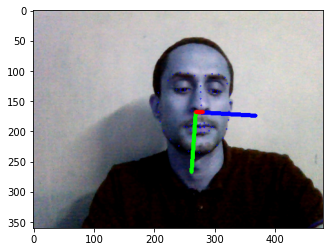

In [41]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    pointx = []
    pointy = []
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = hog_face_detector(gray)
    for face in faces:

        face_landmarks = dlib_facelandmark(gray, face)
#         print(face_landmarks)

        for n in range(0, 68):
            x = face_landmarks.part(n).x
            pointx.append(float(x))
            y = face_landmarks.part(n).y
            pointy.append(float(y))
            cv2.circle(frame, (x, y), 1, (0, 0, 255), 1)
# #             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
            if n == 67:
                print("*************")

        points = np.array(pointx + pointy)
        # #
        arx = np.abs(points[20] - points[32]) 
        ary = np.abs(points[88] - points[100])
        points[:68] = (points[:68] - points[32])/arx
        points[68:136] = (points[68:136] - points[100])/ary
        print(points , len(points))


# #     cv2.imshow("Face Landmarks", frame)
        nose_x, nose_y = pointx[32] , pointy[32]
#     #     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        roll = model1.predict(points[:136].reshape(1,-1))[0]
        yaw = model2.predict(points[:136].reshape(1,-1))[0]
        pitch = model3.predict(points[:136].reshape(1,-1))[0]

# #     plt.imshow(draw_axis(frame, -1*0.018227,-0.399231,0.085676, nose_x, nose_y))
#     
    plt.imshow(draw_axis(frame, -1*yaw , pitch, roll, nose_x, nose_y))

#     cv2.imshow(draw_axis(frame, -1*yaw , pitch, roll, nose_x, nose_y))
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

### *DRAFT FOR MY WORK ABOVE*


In [7]:
from sklearn.ensemble import RandomForestRegressor 
model_one = RandomForestRegressor(n_estimators=100)
model_one.fit(X_train ,y_train["pitch"] )

RandomForestRegressor()

In [8]:
model_one.score(X_test ,y_test["pitch"] )

-0.8288728544416784

In [9]:
model_one.predict(X_test[:1])

array([-0.2882481])

In [10]:
data.iloc[1860,:]

point0       36.140327
point1       43.238537
point2       52.565727
point3       63.379784
point4       81.386673
               ...    
point134    343.423798
point135    345.309814
pitch        -0.380304
yaw          -0.722342
roll          0.006365
Name: 1860, Length: 139, dtype: float64

In [11]:
X_test[:1]

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point126,point127,point128,point129,point130,point131,point132,point133,point134,point135
1860,36.140327,43.238537,52.565727,63.379784,81.386673,113.342819,149.879105,186.232788,220.001389,240.125946,...,364.614319,357.717285,342.011475,339.024384,335.891357,332.415192,320.241821,338.471283,343.423798,345.309814


In [12]:
# predictions = model_one.predict(X_test)
# errors = abs(predictions - y_test["pitch"])
# mape = 100 * np.mean(errors / y_test["pitch"])
# accuracy = 100 - mape
# accuracy

In [13]:
# Number of trees in random forest
n_estimators = [50 ,100 ]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [14]:
# print(f" For {Label} : )

In [15]:
from sklearn.model_selection import GridSearchCV

def triple_predict(label):
    rf = RandomForestRegressor()
    model = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2).fit(X_train,y_train[label])
    print(model.best_params_)
    print(" Score : " , model.score(X_test ,y_test[label] ))
    return model

    

    

In [16]:
model_pitch = triple_predict("pitch")
model_pitch

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 50}
 Score :  -0.8130908284210565


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=2)

In [17]:
model_pitch.predict(X_test[:5])

array([-0.35299493,  0.02609912,  0.00999272, -0.14909471, -0.42938845])

In [18]:
model_one.predict(X_test[:5])

array([-0.2882481 ,  0.04641875,  0.23118901, -0.15955344, -0.36406595])

In [19]:
data.iloc[[X_test[:5].index[:]][0]]

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point129,point130,point131,point132,point133,point134,point135,pitch,yaw,roll
1860,36.140327,43.238537,52.565727,63.379784,81.386673,113.342819,149.879105,186.232788,220.001389,240.125946,...,339.024384,335.891357,332.415192,320.241821,338.471283,343.423798,345.309814,-0.380304,-0.722342,0.006365
353,196.507202,196.531479,198.733170,199.404434,200.094604,199.272568,198.496368,197.653534,215.437866,248.437439,...,305.680481,307.201019,307.947388,314.766357,308.734375,308.903900,307.580139,-0.001322,0.579662,0.039373
1333,118.094704,138.573959,162.380081,182.994202,206.125488,229.817703,249.690689,272.989380,302.991150,325.196259,...,306.752350,298.909027,293.116821,292.907043,310.194244,317.827576,323.571991,0.123026,-0.031844,-0.623425
905,175.960876,171.559448,170.310974,168.951996,168.636612,170.241882,174.322296,182.410217,205.037262,236.657074,...,308.735168,313.157745,317.627380,327.744446,325.554626,322.781189,316.091675,-0.143834,0.312414,0.251424
1289,290.355072,291.989746,294.443146,293.153198,284.702881,269.753601,251.125214,234.429749,231.065353,243.509979,...,306.050720,306.292664,307.044678,313.038269,311.676483,311.434448,310.885284,-0.513948,1.313609,-0.506313


In [20]:
model_yaw = triple_predict("yaw")
model_yaw

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}
 Score :  0.7485532911643815


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=2)

In [21]:
model_yaw.predict(X_test[:5])

array([-0.6834736 ,  0.57861097, -0.01990111,  0.30252172,  1.31029323])

In [22]:
data.iloc[[X_test[:5].index[:]][0]]

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point129,point130,point131,point132,point133,point134,point135,pitch,yaw,roll
1860,36.140327,43.238537,52.565727,63.379784,81.386673,113.342819,149.879105,186.232788,220.001389,240.125946,...,339.024384,335.891357,332.415192,320.241821,338.471283,343.423798,345.309814,-0.380304,-0.722342,0.006365
353,196.507202,196.531479,198.733170,199.404434,200.094604,199.272568,198.496368,197.653534,215.437866,248.437439,...,305.680481,307.201019,307.947388,314.766357,308.734375,308.903900,307.580139,-0.001322,0.579662,0.039373
1333,118.094704,138.573959,162.380081,182.994202,206.125488,229.817703,249.690689,272.989380,302.991150,325.196259,...,306.752350,298.909027,293.116821,292.907043,310.194244,317.827576,323.571991,0.123026,-0.031844,-0.623425
905,175.960876,171.559448,170.310974,168.951996,168.636612,170.241882,174.322296,182.410217,205.037262,236.657074,...,308.735168,313.157745,317.627380,327.744446,325.554626,322.781189,316.091675,-0.143834,0.312414,0.251424
1289,290.355072,291.989746,294.443146,293.153198,284.702881,269.753601,251.125214,234.429749,231.065353,243.509979,...,306.050720,306.292664,307.044678,313.038269,311.676483,311.434448,310.885284,-0.513948,1.313609,-0.506313


In [23]:
model_roll = triple_predict("yaw")
model_roll

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 100}
 Score :  0.7966966021029827


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=2)

In [24]:
model_roll.predict(X_test[:5])

array([-0.68090845,  0.57170467, -0.01491152,  0.30057329,  1.30903484])

In [25]:
data.iloc[[X_test[:5].index[:]][0]]

,point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,...,point129,point130,point131,point132,point133,point134,point135,pitch,yaw,roll
1860,36.140327,43.238537,52.565727,63.379784,81.386673,113.342819,149.879105,186.232788,220.001389,240.125946,...,339.024384,335.891357,332.415192,320.241821,338.471283,343.423798,345.309814,-0.380304,-0.722342,0.006365
353,196.507202,196.531479,198.733170,199.404434,200.094604,199.272568,198.496368,197.653534,215.437866,248.437439,...,305.680481,307.201019,307.947388,314.766357,308.734375,308.903900,307.580139,-0.001322,0.579662,0.039373
1333,118.094704,138.573959,162.380081,182.994202,206.125488,229.817703,249.690689,272.989380,302.991150,325.196259,...,306.752350,298.909027,293.116821,292.907043,310.194244,317.827576,323.571991,0.123026,-0.031844,-0.623425
905,175.960876,171.559448,170.310974,168.951996,168.636612,170.241882,174.322296,182.410217,205.037262,236.657074,...,308.735168,313.157745,317.627380,327.744446,325.554626,322.781189,316.091675,-0.143834,0.312414,0.251424
1289,290.355072,291.989746,294.443146,293.153198,284.702881,269.753601,251.125214,234.429749,231.065353,243.509979,...,306.050720,306.292664,307.044678,313.038269,311.676483,311.434448,310.885284,-0.513948,1.313609,-0.506313


In [26]:
# model_rol.predict(X_test[:5])

In [345]:
import scipy.io


In [28]:
mat53 = scipy.io.loadmat('AFLW2000/image00002.mat')
point = mat53["pt3d_68"][:-1].reshape(1 , 136)[0].reshape(1 , -1)
point.shape

(1, 136)

In [29]:
point[0][32] , point[0][68+32]

(210.7933, 282.3915)

In [30]:
new_pitch = model_pitch.predict(point)
new_yaw = model_yaw.predict(point)
new_roll = model_roll.predict(point)

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
new_pitch , new_roll , new_yaw

(array([-0.3970394]), array([0.03300093]), array([0.01822658]))

In [32]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(255,0,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(0,0,255),5)

    return img

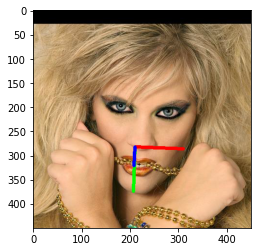

<Figure size 648x432 with 0 Axes>

In [33]:
capture = cv2.VideoCapture('AFLW2000/image00002.jpg')
ret, frame = capture.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


nose_x, nose_y = point[0][32] , point[0][68+32]


plt.imshow(draw_axis(frame, -1*new_yaw, new_pitch, new_roll, nose_x, nose_y))


plt.figure(figsize=(9, 6))

plt.show()


In [34]:
predictor=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()

In [35]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(255,0,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(0,0,255),5)

    return img

In [37]:
points = [269, 271, 273, 280, 294, 317, 345, 376, 404, 421, 429, 432, 432, 433, 435, 432, 428, 318, 332, 351, 370, 386, 400, 409, 419, 428, 431, 396, 403, 409, 416, 385, 396, 406, 414, 420, 339, 350, 360, 369, 360, 350, 402, 410, 418, 422, 417, 409, 365, 384, 399, 407, 413, 419, 424, 419, 413, 406, 398, 384, 373, 398, 406, 412, 420, 413, 407, 398, 297, 321, 347, 372, 394, 410, 421, 429, 428, 422, 408, 390, 369, 349, 331, 313, 297, 272, 260, 254, 256, 264, 265, 261, 260, 262, 271, 282, 296, 308, 323, 340, 342, 345, 342, 337, 289, 286, 285, 290, 293, 293, 291, 288, 288, 294, 296, 294, 375, 371, 367, 369, 367, 369, 375, 380, 381, 382, 381, 380, 375, 373, 374, 373, 374, 373, 374, 373]

In [38]:
points = np.array(points).reshape(1 ,-1)

In [39]:
points.shape

(1, 136)

In [40]:
new_pitch = model_pitch.predict(points)
new_yaw = model_yaw.predict(points)
new_roll = model_roll.predict(points)

C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\anasr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
new_pitch , -1 * new_yaw , new_roll

(array([2.65416888]), array([-0.22092105]), array([0.43367855]))

In [42]:
from sklearn.ensemble import AdaBoostRegressor

In [43]:
model1 = AdaBoostRegressor(  random_state=42, n_estimators=250 , learning_rate=0.6).fit(X_train,y_train["yaw"])
model2 = AdaBoostRegressor( random_state=42, n_estimators=300 , learning_rate=0.6).fit(X_train,y_train["pitch"])
model3 = AdaBoostRegressor( random_state=42, n_estimators=250 , learning_rate=0.6).fit(X_train,y_train["roll"])

In [44]:
model1.score(X_test ,y_test["yaw"] ) , model1.score(X_train ,y_train["yaw"] )

(0.7034947196782143, 0.9864664543477346)

In [46]:
model2.score(X_test ,y_test["pitch"] ) , model2.score(X_train ,y_train["pitch"] )

(-2.3410183724746383, 0.8378214584914147)

In [48]:
model3.score(X_test ,y_test["roll"] ) , model3.score(X_train ,y_train["roll"] )

(0.7100836241691267, 0.8246008208863609)

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test["roll"] , y_pred3 )

In [ ]:

# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# # rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# model_rol = GridSearchCV(estimator = rf, param_grid = random_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2).fit(X_train,y_train["roll"])